# I show the results from the steps to turn the over scan, zero, dark corrected, and stack images to 1D spectra with DoHydra, Flats, and Standard stars

In [1]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt
#import astropy
from astropy.io import fits

#from pyraf import iraf
from scipy import ndimage

Populating the interactive namespace from numpy and matplotlib


# Raw data

In [2]:
SN2012et = fits.open('SN2012et_BPM_5sig.fits')
domeflat = fits.open('Domeflat_0.fits')

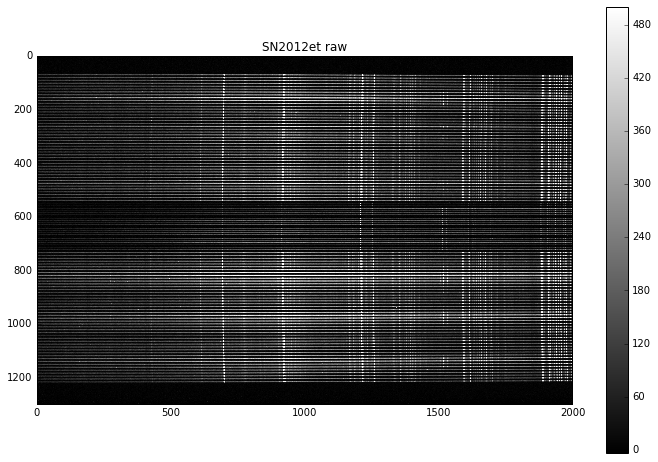

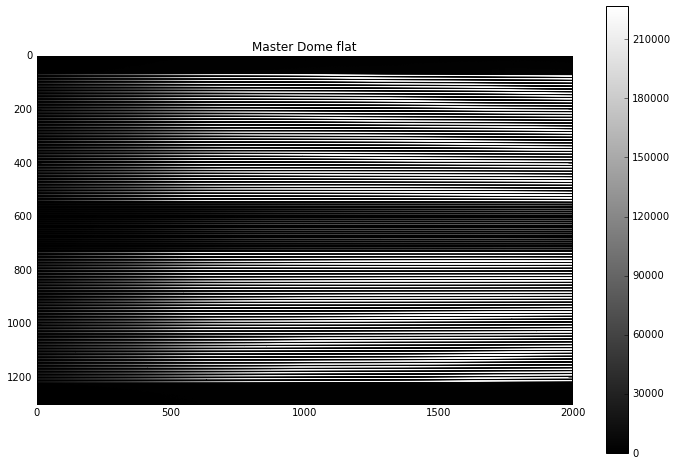

In [3]:
plt.figure(figsize = (12,8))
plt.title('SN2012et raw')
plt.imshow(ndimage.rotate(SN2012et[0].data.T,180), cmap="gray", vmin=-4, vmax=500)
plt.colorbar()

plt.figure(figsize = (12,8))
plt.title('Master Dome flat')
plt.imshow(ndimage.rotate(domeflat[0].data.T,180), cmap="gray")
plt.colorbar()

# Example of how they would trace a fiber with a fitting function => just what the fiber looks like
# These corrections plus an estimate of the width is applied to the fibers above to create 1D spectra

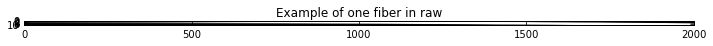

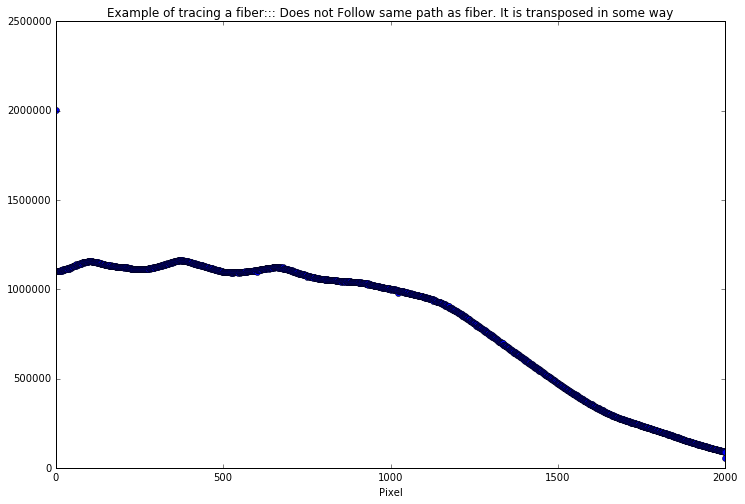

In [55]:
plt.figure(figsize = (12,8))
plt.title('Example of one fiber in raw')
plt.imshow(ndimage.rotate(domeflat[0].data.T,180)[80:90], cmap="gray")#, vmin=-4, vmax=500)
##plt.colorbar()
plt.figure(figsize = (12,8))
plt.title('Example of tracing a fiber::: Does not Follow same path as fiber. It is transposed in some way')
plt.plot(np.sum(domeflat[0].data[:,80:90], axis =1), 'o')
plt.xlabel('Pixel')

## Next, create a Master Function from the Master Flat  to divide out

## 35th order spline function

### I could not figure out how to save this function or where it was being saved to so I took a screen shot of it

In [ ]:
I = plt.imread('function_from_master_flat.tiff')

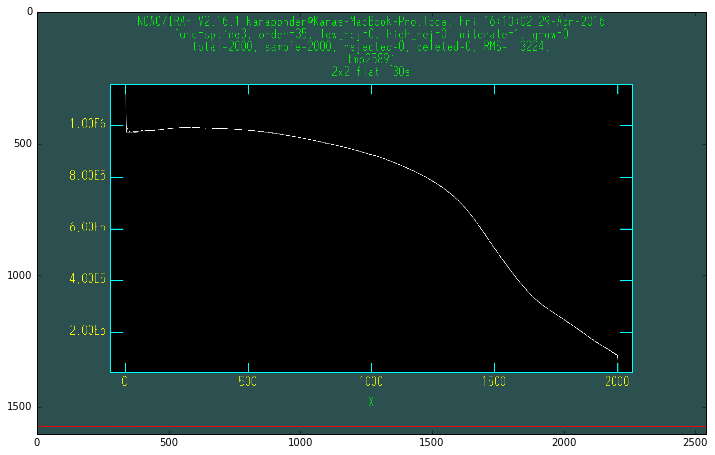

In [60]:
plt.figure(figsize = (12,8))
plt.imshow(I)

## Wavelength calibration from dohydra

In [5]:
# Resulting wavelength calibration from dohydra:

def wave(x):
    return 1.408752*x+4584.803

def wave_x(wavelength):
    return (wavelength-4584.803)/1.408752

## Results from DoHydra: fibers extracted to 1 dimensional, dome flat (pixel to pixel variation) corrected, wavelenght corrected

In [6]:
SN2012et_after_dohydra = fits.open('SN2012et_BPM_5sig.ms.fits')

([<matplotlib.axis.XTick at 0x11b9cc950>,
 <a list of 5 Text xticklabel objects>)

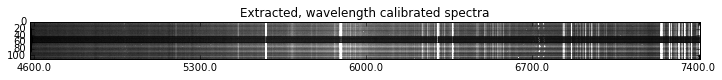

In [7]:
#x = np.arange(0,2005, 1)
#wavelength = 1.408752*x+4584.803

fig, ax = plt.subplots(figsize = (12,12))
ax.set_title('Extracted, wavelength calibrated spectra')
ax.imshow( SN2012et_after_dohydra[0].data, cmap="gray", vmin=0, vmax=3000)

revlabels = np.linspace(4600,7400,5) 
plt.xticks(wave_x(revlabels), revlabels)

#plt.colorbar()

(0, 5000)

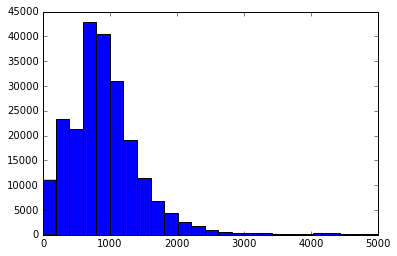

In [8]:
# How to set vmax and vmin 
stuff = plt.hist(SN2012et_after_dohydra[0].data.ravel(), bins = 100)
plt.xlim(0, 5000)

([<matplotlib.axis.XTick at 0x11090bed0>,
 <a list of 5 Text xticklabel objects>)

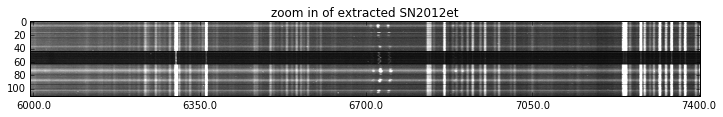

In [9]:
fig = plt.figure(figsize = (12,12))
plt.imshow( SN2012et_after_dohydra[0].data, cmap="gray", vmin=0, vmax=3000)
plt.xlim(1000,2000)
plt.title('zoom in of extracted SN2012et')
revlabels1 = np.linspace(6000,7400,5) 
plt.xticks(wave_x(revlabels1), revlabels1)
#plt.colorbar()

# Next: Run Dohydra on Standard star and Twilight flats

## Results:

In [10]:
BD28 = fits.open('BD28_disp.fits')
BD28_after_dohydra = fits.open('BD28_disp.ms.fits')

([<matplotlib.axis.XTick at 0x127169050>,
 <a list of 5 Text xticklabel objects>)

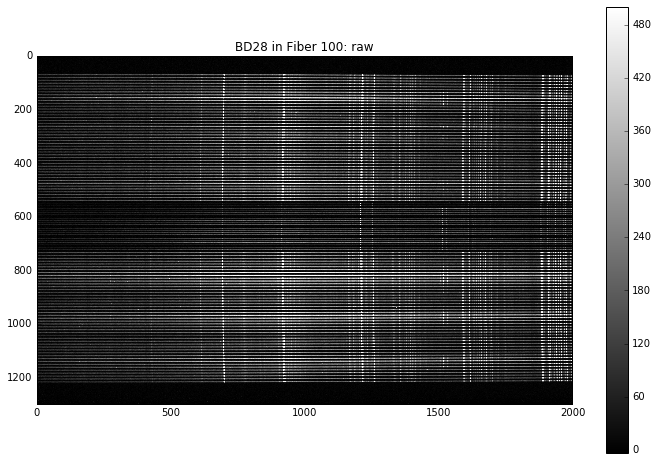

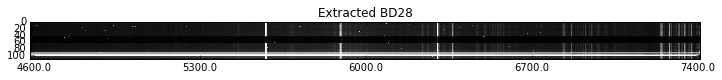

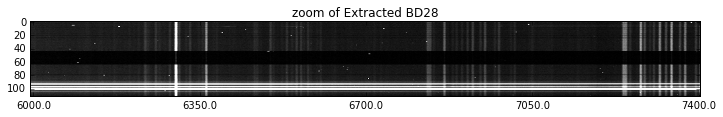

In [62]:
plt.figure(figsize = (12,8))
plt.title('BD28 in Fiber 100: raw')
plt.imshow(ndimage.rotate(SN2012et[0].data.T,180), cmap="gray", vmin=-4, vmax=500)
plt.colorbar()

fig = plt.figure(figsize = (12,12))
plt.imshow( BD28_after_dohydra[0].data, cmap="gray", vmin=0, vmax=3000)
plt.title('Extracted BD28')
revlabels = np.linspace(4600,7400,5) 
plt.xticks(wave_x(revlabels), revlabels)

fig = plt.figure(figsize = (12,12))
plt.imshow( BD28_after_dohydra[0].data, cmap="gray", vmin=0, vmax=3000)
plt.xlim(1000,2000)
plt.title('zoom of Extracted BD28')
plt.xticks(wave_x(revlabels1), revlabels1)

In [14]:
skyflat = fits.open('Skyflat_20160411.fits')
skyflat_after_dohydra = fits.open('Skyflat_20160411_0.ms.fits')

(1000, 1300)

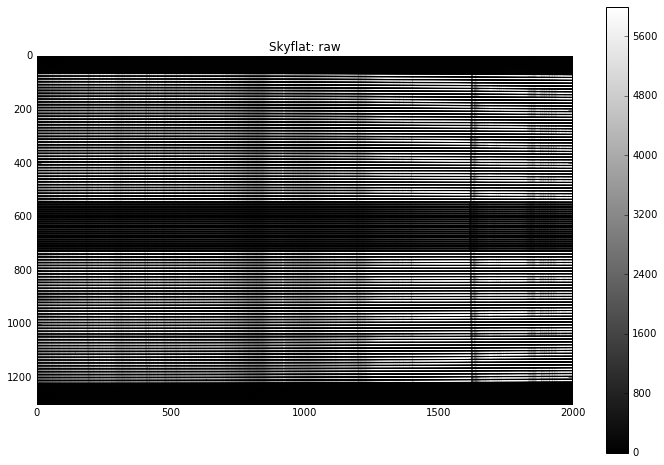

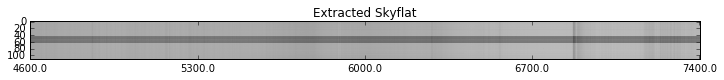

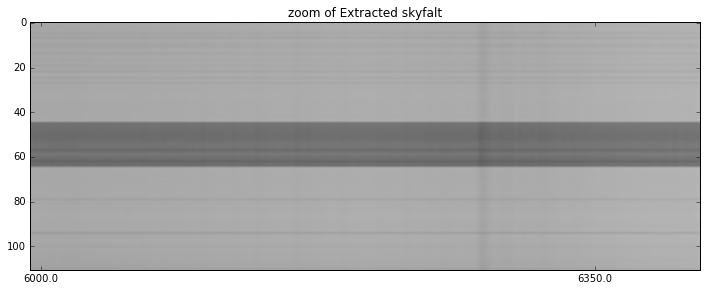

In [15]:
plt.figure(figsize = (12,8))
plt.title('Skyflat: raw')
plt.imshow(ndimage.rotate(skyflat[0].data.T,180), cmap="gray", vmin=-4, vmax=6000)
plt.colorbar()

from matplotlib.colors import LogNorm
fig = plt.figure(figsize = (12,12))
plt.imshow( skyflat_after_dohydra[0].data, cmap="gray",norm=LogNorm(vmin=10, vmax=1000000))
plt.xlim(1000,2000)
plt.title('Extracted Skyflat')
revlabels = np.linspace(4600,7400,5) 
plt.xticks(wave_x(revlabels), revlabels)

fig = plt.figure(figsize = (12,12))
plt.imshow( skyflat_after_dohydra[0].data, cmap="gray", norm=LogNorm(vmin=10, vmax=1000000))
plt.title('zoom of Extracted skyfalt')
plt.xticks(wave_x(revlabels1), revlabels1)
plt.xlim(1000,1300)

(-100, 100000)

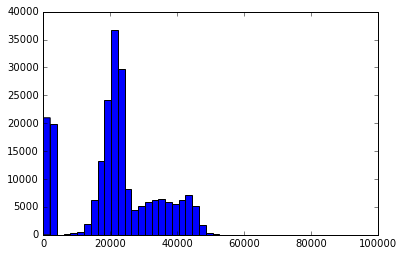

In [16]:
# How to set vmax and vmin 
stuff = plt.hist(skyflat_after_dohydra[0].data.ravel(), bins = 100)
plt.xlim(-100, 100000)

# Do fiber to fiber throughput corrections with twilight flats. 
## Keep in mind that the standard star above was place on Fiber 100

### Divide the all of twilight flat spectra by the spectrum from the fiber with the standard star

In [17]:
skyflat_ratio = fits.open('Skyflat_20160411_ratio.ms.fits')

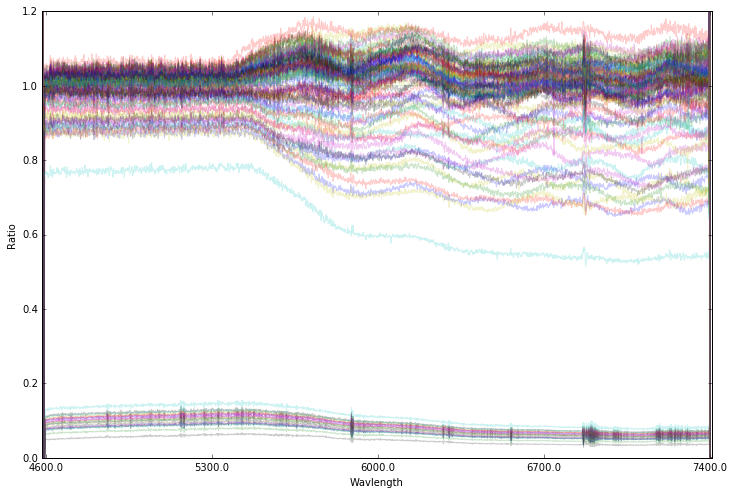

In [18]:
plt.figure(figsize = (12,8))
for i in range(0,111):
    plt.plot(skyflat_ratio[0].data[i,:], alpha = 0.2)
    
plt.ylim(0,1.2)
plt.xlim(0,2005)
plt.xticks(wave_x(revlabels), revlabels)

plt.xlabel('Wavlength')
plt.ylabel('Ratio')

### Fit a smooth correction function to each of these curves 

### The guide says to use a 5th order Legendre Polynomial

In [19]:
skyflat_corr = fits.open('Skyflat_20160411_corr.ms.fits')

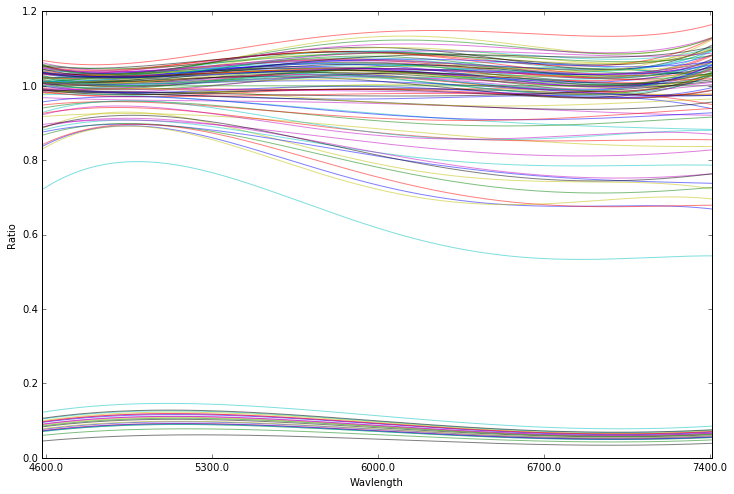

In [20]:
plt.figure(figsize = (12,8))
for i in range(0,111):
    plt.plot(skyflat_corr[0].data[i,:], alpha = 0.5)
    
plt.ylim(0,1.2)
plt.xlim(0,2005)
plt.xticks(wave_x(revlabels), revlabels)

plt.xlabel('Wavlength')
plt.ylabel('Ratio')

### However, as seen below, these are actually not good fits to the curves

([<matplotlib.axis.XTick at 0x10f212490>,
 <a list of 5 Text xticklabel objects>)

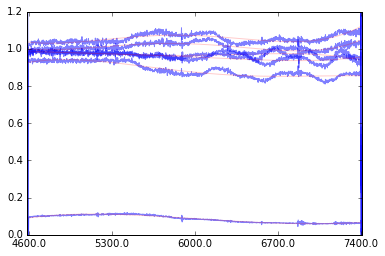

In [21]:
for i in range(0,111,20):
    plt.plot(skyflat_ratio[0].data[i,:],'b', alpha = 0.5)
    plt.plot(skyflat_corr[0].data[i,:],'r', alpha = 0.2)
    
    
plt.ylim(0,1.2)
plt.xlim(0,2005)
plt.xticks(wave_x(revlabels), revlabels)

### I Changed the function to use 20th order spline below:

#### Note: I don't think this changed much, but I should double check it.

In [22]:
skyflat_corr_sp = fits.open('Skyflat__20160420_sp_o20_corr.ms.fits')

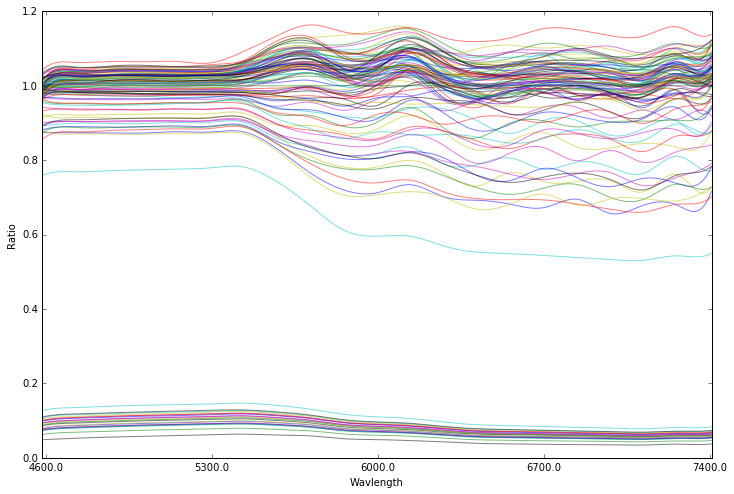

In [23]:
plt.figure(figsize = (12,8))
for i in range(0,111):
    plt.plot(skyflat_corr_sp[0].data[i,:], alpha = 0.5)
    
plt.ylim(0,1.2)
plt.xlim(0,2005)
plt.xticks(wave_x(revlabels), revlabels)

plt.xlabel('Wavlength')
plt.ylabel('Ratio')

([<matplotlib.axis.XTick at 0x110837310>,
 <a list of 5 Text xticklabel objects>)

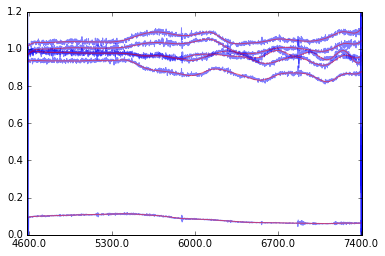

In [24]:
for i in range(0,111,20):
    plt.plot(skyflat_ratio[0].data[i,:],'b', alpha = 0.5)
    plt.plot(skyflat_corr_sp[0].data[i,:],'r', alpha = 0.5)
    
    
plt.ylim(0,1.2)
plt.xlim(0,2005)
plt.xticks(wave_x(revlabels), revlabels)

### Next Step is to divided out the object spectra by these curves and then you have sky/TWILIGHT flat corrected spectra. (Fiber to Fiber throughput corrected)

In [25]:
SN2012et_sflatcorr = fits.open('SN2012et_BPM_5sig_sflatcorr.ms.fits')

([<matplotlib.axis.XTick at 0x10f240c10>,
 <a list of 5 Text xticklabel objects>)

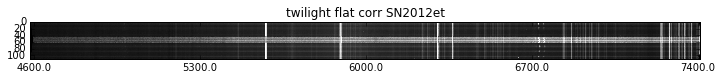

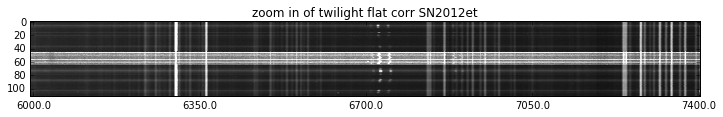

In [26]:
fig = plt.figure(figsize = (12,12))
plt.imshow( SN2012et_sflatcorr[0].data, cmap="gray", vmin=0, vmax=7000)
plt.title('twilight flat corr SN2012et')
plt.xticks(wave_x(revlabels), revlabels)
#plt.colorbar()

fig = plt.figure(figsize = (12,12))
plt.imshow( SN2012et_sflatcorr[0].data, cmap="gray", vmin=0, vmax=7000)
plt.xlim(1000,2000)
plt.title('zoom in of twilight flat corr SN2012et')

plt.xticks(wave_x(revlabels1), revlabels1)

### Twilight flat correct standard star observations as well

([<matplotlib.axis.XTick at 0x114f5f510>,
 <a list of 5 Text xticklabel objects>)

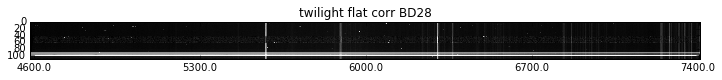

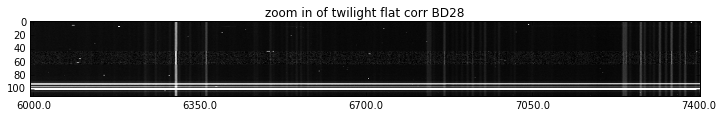

In [27]:
BD28_sflatcorr = fits.open('BD28_disp_sflatcorr_skyup.ms.fits')

fig = plt.figure(figsize = (12,12))
plt.imshow( BD28_sflatcorr[0].data, cmap="gray", vmin=0, vmax=7000)
plt.title('twilight flat corr BD28')
plt.xticks(wave_x(revlabels), revlabels)
#plt.colorbar()

fig = plt.figure(figsize = (12,12))
plt.imshow( BD28_sflatcorr[0].data, cmap="gray", vmin=0, vmax=7000)
plt.xlim(1000,2000)
plt.title('zoom in of twilight flat corr BD28')

plt.xticks(wave_x(revlabels1), revlabels1)

## Compare standard star observations to library

### Start by extracting only fiber 100. 

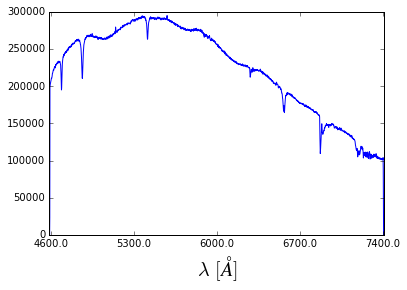

In [63]:
BD28_F100_sflatcorr = fits.open('BD28_100only_sflatcorr_skyup.ms.fits')

plt.plot(BD28_F100_sflatcorr[0].data)
plt.xlim(0,2005)
plt.xticks(wave_x(revlabels), revlabels)
plt.xlabel(r'$\lambda \ [\AA]$', size = 20)
  

### Compare this spectrum to the spectrum in the library. The result if is a file that compares the two fluxes.

In [29]:
flux_file = np.loadtxt('flux_file_skyup_for_readin')
## Wavelength, standard star flux, something???, something?? possibly extinction 
#and instrumental response


In [30]:
np.shape(flux_file) # comparing 68 points on the spectra

(68, 4)

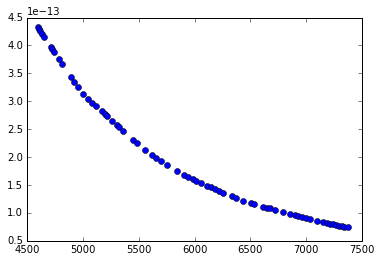

In [31]:
plt.plot(flux_file[:,0], flux_file[:,1], 'o')

### Determine Sensitivity function fit flux differences with a 30th order spline

In [32]:
sens_func = fits.open('flux_file_skyup_sens.0100.fits')

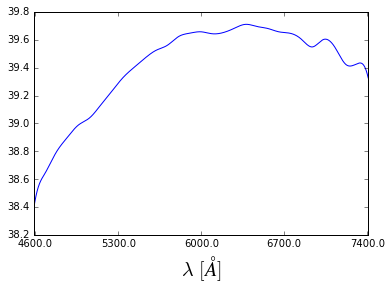

In [64]:
plt.plot(sens_func[0].data)
plt.xlim(0,2005)
plt.xticks(wave_x(revlabels), revlabels)
plt.xlabel(r'$\lambda \ [\AA]$', size = 20)

### Apply (divide?) the sensitivity function to the data

In [34]:
SN2012et_calibrated = fits.open('SN2012et_BPM_5sig_calibrated_o30_m6.fits')

([<matplotlib.axis.XTick at 0x118362550>,
 <a list of 5 Text xticklabel objects>)

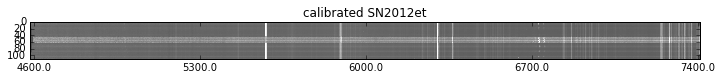

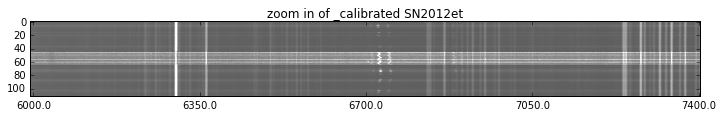

In [35]:
fig = plt.figure(figsize = (12,12))
plt.imshow( SN2012et_calibrated[0].data, cmap="gray", vmin=-1e-15, vmax=2e-15)
plt.title('calibrated SN2012et')
plt.xticks(wave_x(revlabels), revlabels)
#plt.colorbar()

fig = plt.figure(figsize = (12,12))
plt.imshow( SN2012et_calibrated[0].data, cmap="gray",  vmin=-1e-15, vmax=2e-15)
plt.xlim(1000,2000)
plt.title('zoom in of _calibrated SN2012et')

plt.xticks(wave_x(revlabels1), revlabels1)

(-1e-15, 2e-15)

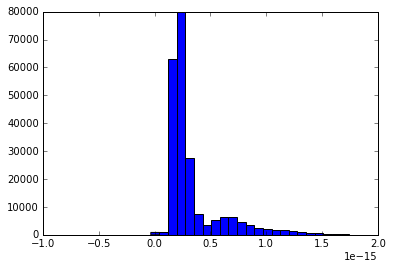

In [36]:
# How to set vmax and vmin 
stuff = plt.hist(SN2012et_calibrated[0].data.ravel(), bins = 100)
plt.xlim(-1e-15, 2e-15)

# Calibrated spectrum for fiber 100

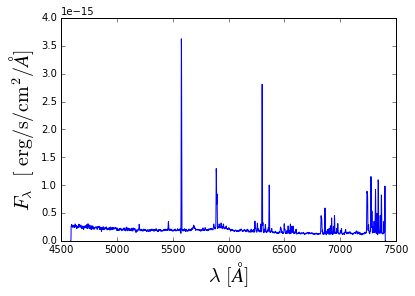

In [61]:
x = np.arange(0,2005, 1)
wavelength = wave(x)

plt.plot(wavelength, SN2012et_calibrated[0].data[99])
plt.xlabel(r'$\lambda \ [\AA]$', size = 20)
plt.ylabel(r'$F_{\lambda}  \ \ [\ {\rm erg/s}{\rm /cm}^2/\AA]$', size = 20)